In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv("creditcard.csv")
print("Shape before cleaning:", df.shape)

# (a) CLEANING
# Remove duplicate rows if any — duplicates can bias model training
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# (b) MISSING VALUE IMPUTATION
# Check for missing values
print("Missing values per column:\n", df.isnull().sum().head())

# Although this dataset has no missing values, we demonstrate the imputation step
imputer = SimpleImputer(strategy="median")
df[df.columns] = imputer.fit_transform(df[df.columns])

# (c) OUTLIERS HANDLING
# 'Amount' has heavy skew; clip at 1st and 99th percentiles to reduce outlier impact
q1, q99 = np.percentile(df["Amount"], [1, 99])
df["Amount"] = np.clip(df["Amount"], q1, q99)

print("[Preprocessing complete]")

# Separate features and target
X = df.drop(columns=["Class"])
y = df["Class"]

Shape before cleaning: (284807, 31)
Shape after removing duplicates: (283726, 31)
Missing values per column:
 Time    0
V1      0
V2      0
V3      0
V4      0
dtype: int64
[Preprocessing complete]


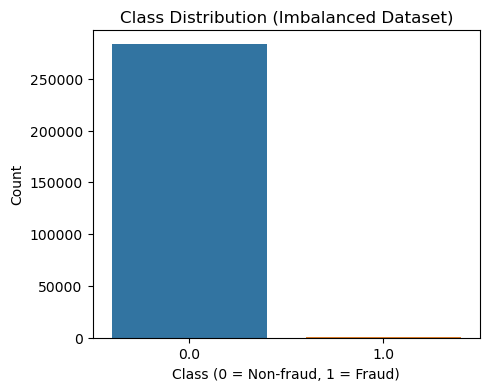

Fraud cases proportion: 0.1667%


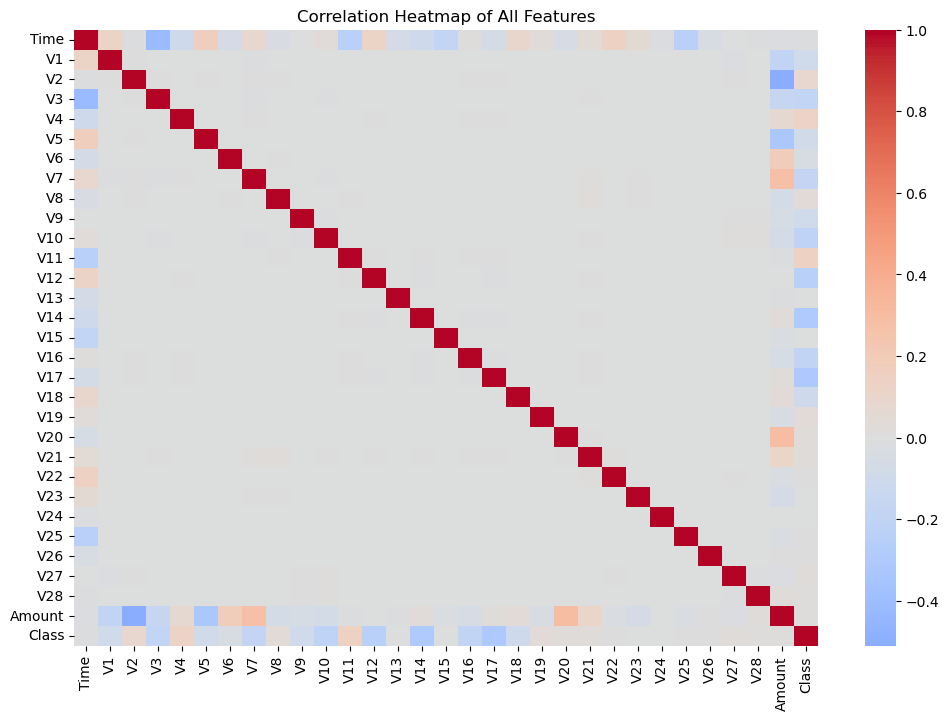


Top 10 correlations with target:
 Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64


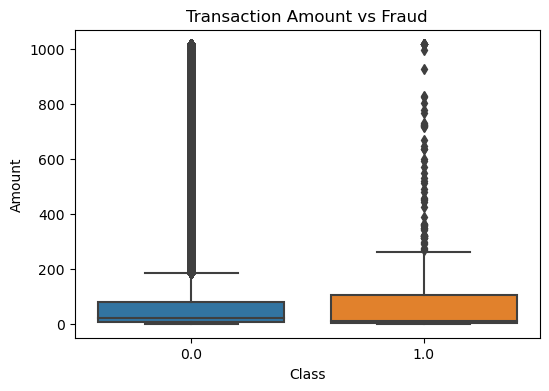

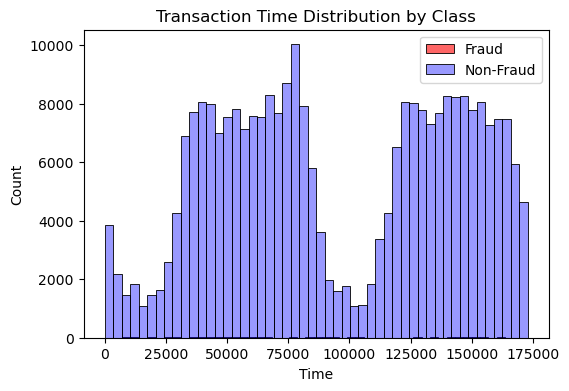

In [3]:
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Class Distribution (Imbalanced Dataset)")
plt.xlabel("Class (0 = Non-fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

fraud_ratio = y.mean() * 100
print(f"Fraud cases proportion: {fraud_ratio:.4f}%")

# Correlation matrix
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of All Features")
plt.show()

# Check top correlated features with target
corr_target = corr["Class"].sort_values(ascending=False)
print("\nTop 10 correlations with target:\n", corr_target.head(10))

# Boxplot: Amount distribution by Class
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()

# Time analysis: fraud over time pattern (optional insight)
plt.figure(figsize=(6,4))
sns.histplot(df[df["Class"]==1]["Time"], bins=50, color="red", label="Fraud", alpha=0.6)
sns.histplot(df[df["Class"]==0]["Time"], bins=50, color="blue", label="Non-Fraud", alpha=0.4)
plt.title("Transaction Time Distribution by Class")
plt.legend()
plt.show()

In [4]:
#Insights from EDA

#Fraud accounts for less than 0.2% of transactions — extremely imbalanced.

#Features V14, V17, and V12 show stronger correlations with the fraud label.

#Fraud transactions often involve smaller amounts and appear in specific time windows.


Classification Report:
               precision    recall  f1-score   support

         0.0     0.9997    0.9646    0.9819     56651
         1.0     0.0388    0.8526    0.0743        95

    accuracy                         0.9644     56746
   macro avg     0.5193    0.9086    0.5281     56746
weighted avg     0.9981    0.9644    0.9804     56746

Confusion Matrix:
 [[54647  2004]
 [   14    81]]
ROC-AUC: 0.9060626049245193


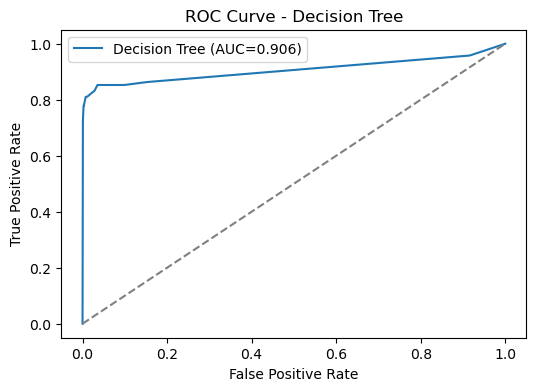

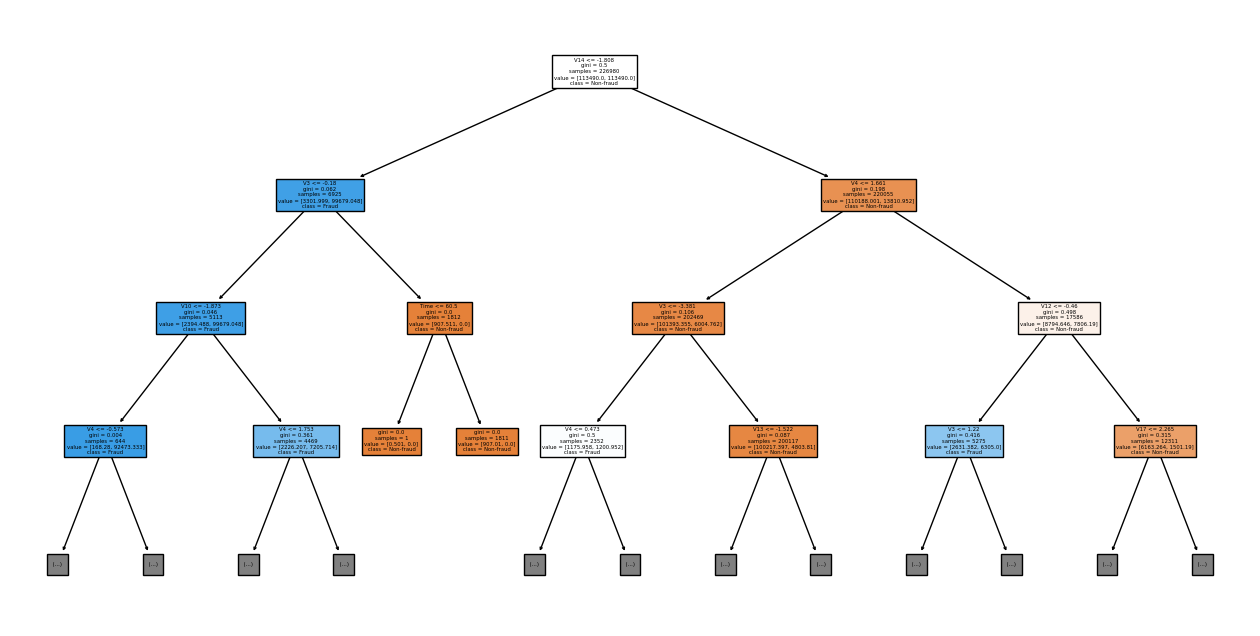

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Decision Tree model — interpretable, useful for initial exploration
clf = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={roc_auc_score(y_test,y_prob):.3f})")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

# Visualize Tree
plt.figure(figsize=(16,8))
plot_tree(
    clf,
    feature_names=list(X.columns),
    class_names=["Non-fraud", "Fraud"],
    filled=True,
    max_depth=3
)
plt.show()

In [6]:
#Potential Research Question:
----------------------------
#Can we identify which specific transaction features most effectively distinguish fraud from legitimate transactions?

#Our EDA revealed:
  #• Extremely low fraud ratio (<0.2%) → need for resampling or class-weighting.
  #• Features V14, V17, V12 have the strongest correlations with 'Class'.
  #• Fraud often occurs in smaller transactions and specific time intervals.

#Therefore, a deeper investigation could focus on feature importance 
#(using models like Random Forest or SHAP values) and anomaly detection techniques 
#to understand which hidden variables (among V1–V28) encode fraudulent behavior.

SyntaxError: invalid syntax (3593740289.py, line 2)